# Alpha Vantage API 
## Enter in your stock symbol

In [20]:
import plotly.plotly as py
import plotly.figure_factory as ff
import pandas as pd
import requests
import json as js
import matplotlib.pyplot as plt

In [21]:
def fetch_symbol(query):
    stock = ''
    while not stock:
        stock = input("What stock would you like to view? ")
    return requests.get(api_root + api_series + stock + api).json()

In [22]:
def series():
    """this function promts the user for the desired time series. Day, week, month, etc"""
    while True:
        t_type = input('Please enter time series you would like to see. ' \
                  'Daily[1], Weekly[2], Monthly[3]: ')
        if t_type == '1':
            t_type = 'Time Series (Daily)'
            return t_type
        elif t_type == '2':
            t_type = 'Weekly Time Series'
            return t_type
        elif t_type == '3':
            t_type = 'Monthly Time Series'
            return t_type
        else:
            print('Error')
            continue
    return t_type

In [23]:
def time_series(t_series):
    """this"""
    if t_series == 'Time Series (Daily)':
        api_series = '/query?function=TIME_SERIES_DAILY&symbol='
        return api_series
    elif t_series == 'Weekly Time Series':
        api_series = '/query?function=TIME_SERIES_WEEKLY&symbol='
        return api_series
    elif t_series == 'Monthly Time Series':
        api_series = '/query?function=TIME_SERIES_MONTHLY&symbol='
        return api_series
    else:
        print('Error') #DeBug
        print(t_series) #DeBug

In [24]:
def company_symbol():
    try:
        #stock = ''
        #while not stock:
            #stock = input("What stock would you like to view? ")
        stock = fetch_symbol(stock)
        if len(stock) == 0:
            print("Please enter a symbol.")
        elif (stock) == 'Error Message':
            print('else statment')
    except requests.exceptions.ConnectionError:
        print("Couldn't connect to server! Please check the network?")
    return stock

In [30]:
t_series = series()
api_root = 'https://www.alphavantage.co'
api_series = time_series(t_series)
api = '&apikey=EKFVA2O5LEO3WL88'
fhand = fetch_symbol(t_series)
#print(fhand)
#print(fhand[t_series]) #DeBug
#print(t_series)

Please enter time series you would like to see. Daily[1], Weekly[2], Monthly[3]: 1
What stock would you like to view? AMD


## This Block loops through the file handle to extract the date and price of the stock for that date

In [31]:
lst = []

for key, values in fhand.items():
    if key == t_series:
        for date, sinfo in values.items():
            #Finds the date and values for stock
            for cols, nums in sinfo.items():
                #finds the closing price
                if cols == '4. close':
                    #create list for date and price key values
                    lst.append([date,nums])
            
#create series from list            
#ds = pd.Series(lst)
#create dataframe from list
df = pd.DataFrame(lst,columns=['Date','Price'])
#print(ds)
print(df)

          Date    Price
0   2019-01-04  19.0000
1   2019-01-03  17.0500
2   2019-01-02  18.8300
3   2018-12-31  18.4600
4   2018-12-28  17.8200
5   2018-12-27  17.4900
6   2018-12-26  17.9000
7   2018-12-24  16.6500
8   2018-12-21  16.9300
9   2018-12-20  17.9400
10  2018-12-19  18.1600
11  2018-12-18  19.5000
12  2018-12-17  18.8300
13  2018-12-14  19.9000
14  2018-12-13  19.8600
15  2018-12-12  20.4800
16  2018-12-11  19.9800
17  2018-12-10  19.9900
18  2018-12-07  19.4600
19  2018-12-06  21.3000
20  2018-12-04  21.1200
21  2018-12-03  23.7100
22  2018-11-30  21.3000
23  2018-11-29  21.4300
24  2018-11-28  21.3400
25  2018-11-27  21.0500
26  2018-11-26  20.0800
27  2018-11-23  19.3800
28  2018-11-21  18.7300
29  2018-11-20  19.2100
..         ...      ...
70  2018-09-24  32.6100
71  2018-09-21  31.0200
72  2018-09-20  31.1800
73  2018-09-19  31.2100
74  2018-09-18  31.9300
75  2018-09-17  32.4300
76  2018-09-14  32.7200
77  2018-09-13  30.4800
78  2018-09-12  32.2100
79  2018-09-11  

TypeError: unhashable type: 'numpy.ndarray'

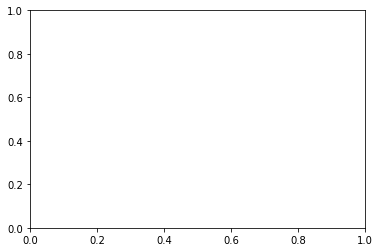

In [32]:
plt.plot(df)
plt.show()